## Importing libraries

In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training image processing

In [63]:
training_set = tf.keras.utils.image_dataset_from_directory(
   'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [64]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [65]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [66]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 54.25  47.25  59.25]
   [ 51.25  44.25  56.25]
   [ 49.25  43.25  54.25]
   ...
   [ 66.75  58.25  69.75]
   [ 64.75  56.25  67.75]
   [ 62.25  53.75  65.25]]

  [[ 91.75  83.5   99.  ]
   [ 87.75  79.5   95.  ]
   [ 91.25  83.    98.5 ]
   ...
   [121.   110.   126.25]
   [117.75 106.75 123.  ]
   [111.5  100.5  116.75]]

  [[ 92.75  83.75 102.75]
   [ 84.    75.    94.  ]
   [ 96.5   87.5  106.5 ]
   ...
   [115.   103.25 123.  ]
   [118.75 107.   126.75]
   [115.   103.25 123.  ]]

  ...

  [[130.   122.   145.  ]
   [140.75 132.75 155.75]
   [135.75 127.75 150.75]
   ...
   [150.   142.   166.  ]
   [153.5  145.5  169.5 ]
   [151.5  143.5  167.5 ]]

  [[131.25 123.25 146.25]
   [138.   130.   153.  ]
   [127.75 119.75 142.75]
   ...
   [148.25 140.25 164.25]
   [153.75 145.75 169.75]
   [149.   141.   165.  ]]

  [[128.   120.   143.  ]
   [134.25 126.25 149.25]
   [133.75 125.75 148.75]
   ...
   [152.5  144.5  168.5 ]
   [154.75 146.75 170.75]
   [153.75 145.75 16

## Building Models

In [67]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [68]:
model = Sequential()

In [69]:
## Building Convolutional Layers

In [70]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [71]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [72]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [73]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [75]:
model.add(Dropout(0.25))

In [76]:
model.add(Flatten())

In [77]:
model.add(Dense(units=1500,activation='relu'))

In [78]:
model.add(Dropout(0.4))

In [79]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [81]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use the standard Adam optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


## Model training

In [82]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3199s 1s/step - accuracy: 0.4050 - loss: 2.1263 - val_accuracy: 0.8252 - val_loss: 0.5420
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3915s 2s/step - accuracy: 0.8364 - loss: 0.5234 - val_accuracy: 0.8972 - val_loss: 0.3214
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 18801s 9s/step - accuracy: 0.9076 - loss: 0.2899 - val_accuracy: 0.9187 - val_loss: 0.2539
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3688s 2s/step - accuracy: 0.9347 - loss: 0.2005 - val_accuracy: 0.9331 - val_loss: 0.2085
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3137s 1s/step - accuracy: 0.9530 - loss: 0.1459 - val_accuracy: 0.9553 - val_loss: 0.1391
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 15852s 7s/step - accuracy: 0.9641 - loss: 0.1100 - val_accuracy: 0.9517 - val_loss: 0.1521
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2969s 1s/step - accuracy: 0.9698 - loss: 0.0926 - val_accuracy: 0.9578 - val_loss: 0.1421
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3283s 1s/step - accuracy: 0.9736

## Model evaluation

In [83]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2448s 1s/step - accuracy: 0.9909 - loss: 0.0291


In [84]:
print(train_loss,train_acc)

0.026777371764183044 0.991706371307373


In [85]:
# Model Salidation Set

In [87]:
val_loss,Val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 180s 327ms/step - accuracy: 0.9647 - loss: 0.1163


In [88]:
print(val_loss,Val_acc)

0.11555734276771545 0.9659116864204407


## Saving Model

In [89]:
model.save("trained_model.keras")

In [90]:
training_history.history

{'accuracy': [0.6076961159706116,
  0.8595917224884033,
  0.9145458340644836,
  0.9385162591934204,
  0.9545913934707642,
  0.9653176069259644,
  0.971278190612793,
  0.9750195741653442,
  0.9782488346099854,
  0.9806671738624573],
 'loss': [1.3420906066894531,
  0.44749268889427185,
  0.26546913385391235,
  0.18865129351615906,
  0.1403239369392395,
  0.10521526634693146,
  0.08759187906980515,
  0.0764329805970192,
  0.06704390794038773,
  0.0606149397790432],
 'val_accuracy': [0.8251764178276062,
  0.8972228765487671,
  0.9187343716621399,
  0.9330753684043884,
  0.9552697539329529,
  0.9516844749450684,
  0.957773745059967,
  0.9636353254318237,
  0.948668360710144,
  0.9659116864204407],
 'val_loss': [0.5419501662254333,
  0.3213578760623932,
  0.25391000509262085,
  0.20851516723632812,
  0.13908153772354126,
  0.1520649790763855,
  0.1420564502477646,
  0.1212274357676506,
  0.16249331831932068,
  0.11555738002061844]}

In [91]:
##Recording history
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [92]:
training_history.history['accuracy']

[0.6076961159706116,
 0.8595917224884033,
 0.9145458340644836,
 0.9385162591934204,
 0.9545913934707642,
 0.9653176069259644,
 0.971278190612793,
 0.9750195741653442,
 0.9782488346099854,
 0.9806671738624573]

## Accuracy Visualization

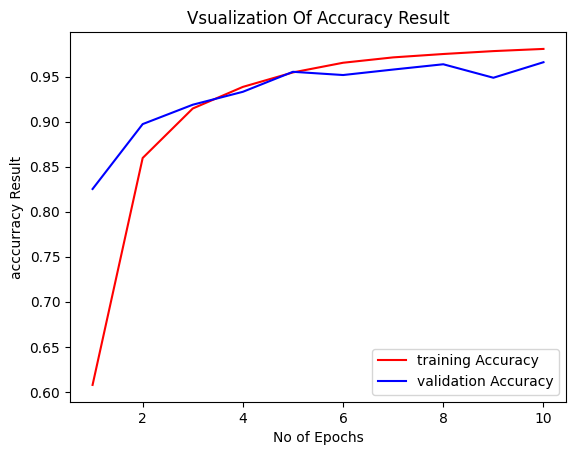

In [93]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("acccurracy Result")
plt.title("Vsualization Of Accuracy Result")
plt.legend()
plt.show()

## Metrics for model evaluation

In [94]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [95]:
test_set =  tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [96]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 213s 386ms/step


(array([[1.0000000e+00, 4.2182380e-10, 3.8148516e-11, ..., 6.5038551e-14,
         1.4777480e-13, 7.0712225e-12],
        [9.9999952e-01, 8.6643634e-09, 1.7311576e-10, ..., 2.2051110e-13,
         9.6983717e-13, 3.6437446e-12],
        [1.0000000e+00, 2.0342206e-09, 4.0417880e-10, ..., 1.4570751e-14,
         1.0790344e-12, 2.8428040e-10],
        ...,
        [1.6397620e-09, 5.8871595e-14, 1.1998862e-09, ..., 2.4988286e-12,
         2.4952547e-13, 9.9999928e-01],
        [1.5545021e-10, 2.5246289e-15, 5.5577161e-11, ..., 1.4637785e-12,
         3.6300577e-13, 1.0000000e+00],
        [1.6374024e-14, 3.1657607e-15, 1.6076477e-14, ..., 2.2827945e-17,
         3.2743992e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [97]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [98]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [99]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [102]:
import tensorflow as tf

# Example one-hot encoded labels
true_cartegories = tf.constant([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
Y_true = tf.argmax(true_cartegories, axis=1)
print("Y_true:", Y_true)


Y_true: tf.Tensor([1 0 2], shape=(3,), dtype=int64)


In [103]:
## precision recall

In [105]:
print("Y_true shape:", Y_true.shape)
print("predicted_categories shape:", predicted_categories.shape)


Y_true shape: (3,)
predicted_categories shape: (17572,)


In [113]:
predicted_categories = predicted_categories[:len(Y_true)]


In [110]:
limited_target_names = [class_name[i] for i in np.unique(Y_true_subset)]
print(classification_report(Y_true_subset, predicted_categories_subset, target_names=limited_target_names))



                          precision    recall  f1-score   support

      Apple___Apple_scab       0.33      1.00      0.50         1
       Apple___Black_rot       0.00      0.00      0.00         1
Apple___Cedar_apple_rust       0.00      0.00      0.00         1

                accuracy                           0.33         3
               macro avg       0.11      0.33      0.17         3
            weighted avg       0.11      0.33      0.17         3



C:\Users\PC\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
Y_true_subset = Y_true[:3]
predicted_categories_subset = predicted_categories[:3]
print(classification_report(Y_true_subset, predicted_categories_subset, target_names=class_name))





ValueError: Number of classes, 3, does not match size of target_names, 38. Try specifying the labels parameter

In [114]:
cm =confusion_matrix(Y_true,predicted_categories)
cm

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

### Confusion Matrix Visualization

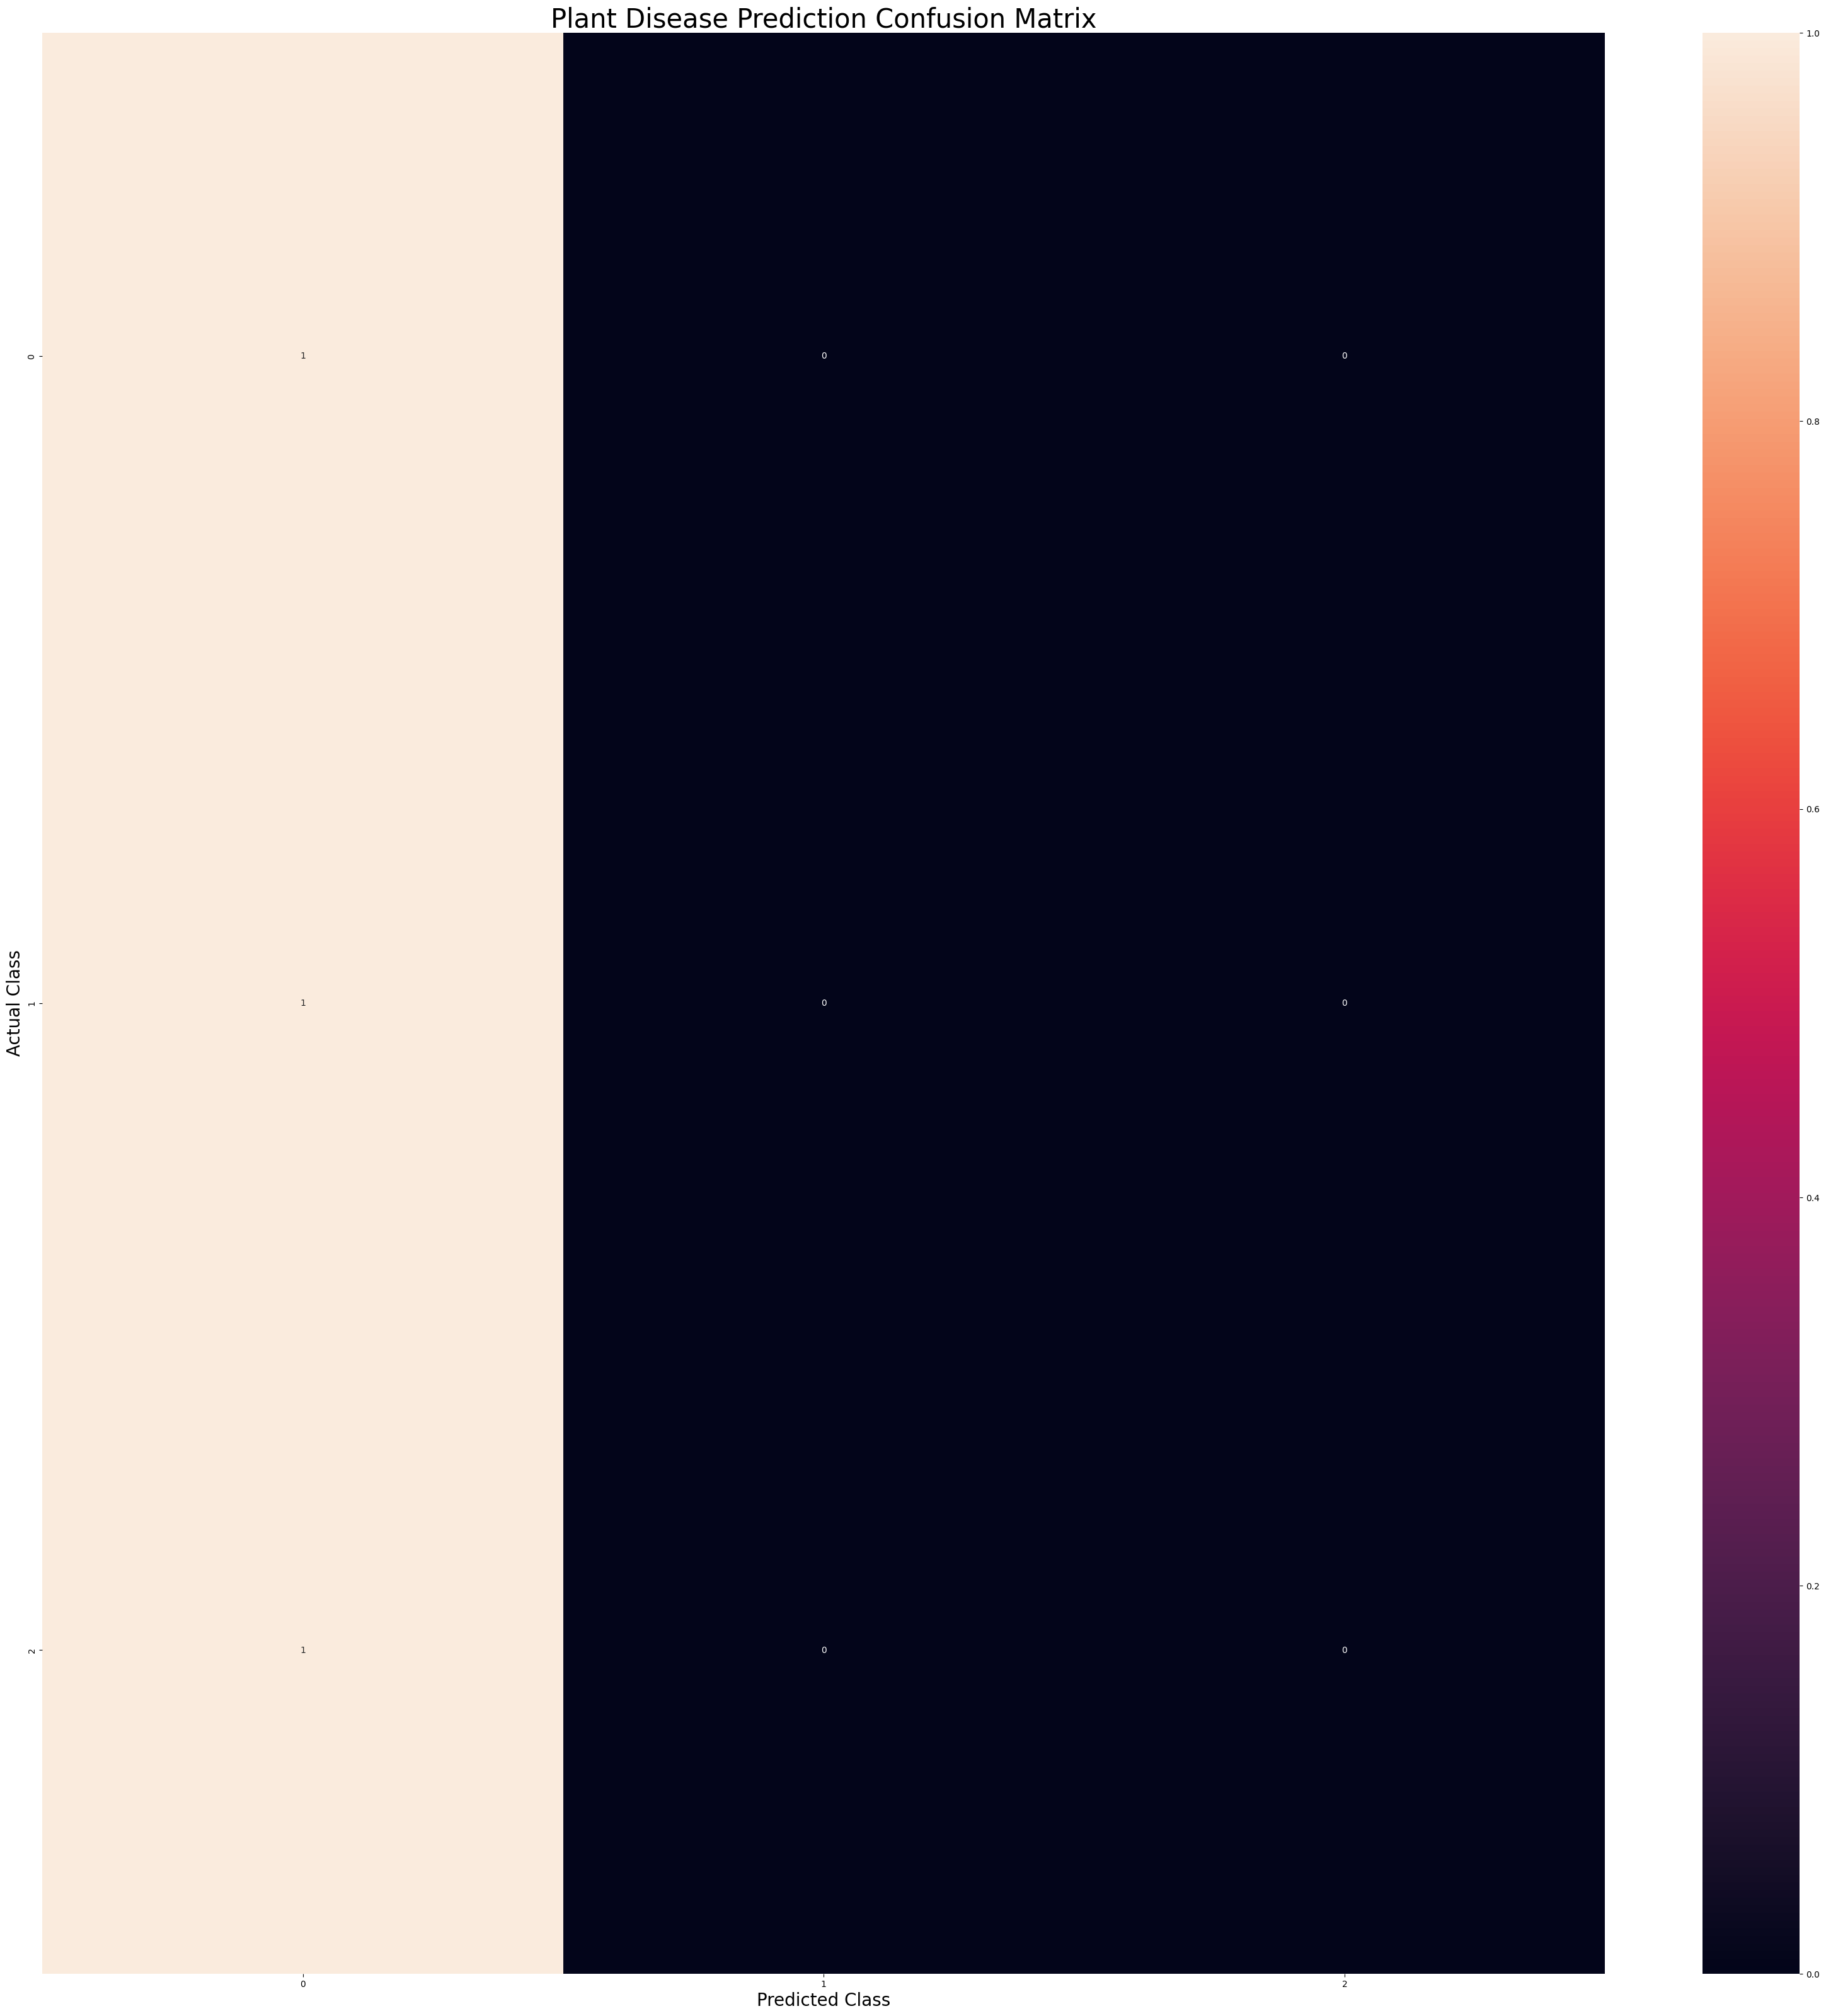

In [115]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()